# 📊 Irrigation Dataset - Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the irrigation survey dataset.

**Dataset**: `Irrigation_DS.xlsx`  
**Rows**: 30 survey responses  
**Columns**: 70 variables covering survey metadata, land preparation, cultivation, fertilization, production, pest control, and water consumption

---

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_excel('Irrigation_DS_Clean.xlsx')

print("✓ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

✓ Dataset loaded successfully!

Dataset shape: 30 rows × 55 columns


## 2. Data Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print("=" * 100)
display(df.head())

First 5 rows of the dataset:


,survey_date,governorate,district,village_name,irrigation_system_type,crop_type,land_prep_plowing_cost_per_acre,land_prep_settlement_cost_per_acre,land_prep_division_cost_per_acre,land_prep_terracing_cost_per_acre,land_prep_total_cost,land_prep_workers_count,land_prep_worker_wage_per_day,land_prep_working_days,land_prep_labor_total_cost,land_prep_grand_total_cost,nursery_prep_total_cost,cultivation_laborers_count,cultivation_seeds_quantity,cultivation_worker_wage_per_day,cultivation_labor_total_cost,fertilizer_quantity_kg,fertilizer_cost_yer,fertilizer_total_cost,production_quantity_baskets_kg,production_harvest_frequency_per_month,production_total_harvest_cost,production_harvest_labor_cost,production_final_harvest_cost_yer,pest_control_type,pest_control_biological,pest_control_mechanical,pest_control_chemical,pest_control_other,pest_control_chemical_materials_cost,pest_control_workers_count,pest_control_worker_wage_per_day,pest_control_working_days,pest_control_labor_total_cost,pest_control_grand_total_cost,water_meter_reading,water_pumping_hours_per_irrigation,water_irrigation_frequency_per_month,water_calculated_hours_per_month,water_diesel_cost,water_workers_count,water_worker_wage_per_day,water_working_days_per_month,water_labor_total_cost,water_grand_total_cost,water_pumping_mechanism_type,water_engine_hours_per_acre_per_day,water_diesel_quantity_last_month,water_diesel_cost_last_month,record_index
0,2020-01-07,Lahj,Tuban,كدمه عوض علي,Traditional,Eggplant,42000,16000,16000,12000,86000,8,1500,1,12000,98000,120000,2,2000,1,4000,25,720,18000,120.00,1.00,250,30000,15000.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,10000.00,2,4000,2,16000,26000,294,12,4,160.00,64000,2,5000,4,40000,104000,مضخات الديزل,12,100,64000,11
1,2020-01-27,Lahj,Tuban,بئر فضل,Drip,Eggplant,0,0,0,0,0,0,0,0,0,0,120000,2,2000,1,4000,0,0,0,0.00,1.00,0,0,0.00,"اخرى(باستخدام الدورة الزراعية, خدمة الارض مثل ...",0,0,0,1,NaN,2,2000,6,24000,24000,115,2,10,66.70,26680,1,2000,10,20000,46680,مضخات الديزل,2,40,16000,22
2,2020-01-08,Lahj,Tuban,كوكبان,Traditional,Tomato,14000,28000,14000,14000,70000,4,4000,1,16000,86000,120000,2,4000,2,16000,70,700,49000,3200.00,5.00,150,480000,410000.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,63000.00,3,3000,3,27000,90000,343,16,7,373.30,149320,2,2500,7,35000,184320,مضخات الديزل,18,280,112000,13
3,2020-01-08,Lahj,Tuban,هران ديان,Drip,Tomato,24000,21000,14000,0,59000,0,0,0,0,59000,120000,6,3000,2,36000,60,750,45000,800.00,1.00,150,120000,14000.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,28000.00,1,3000,4,12000,40000,147,4,15,200.00,80000,1,3000,10,30000,110000,مضخات الديزل,4,160,60000,16
4,2020-01-08,Lahj,Tuban,الحمراء,Drip,pepper,24000,21000,0,0,45000,0,0,0,0,45000,120000,3,1500,2,9000,50,700,35000,2000.00,3.00,200,400000,202800.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,51000.00,3,2000,3,18000,69000,169,4,8,106.70,42680,1,2000,8,16000,58680,مضخات كهرباء,4,0,10000,15


In [4]:
# Display last few rows
print("Last 5 rows of the dataset:")
print("=" * 100)
display(df.tail())

Last 5 rows of the dataset:


,survey_date,governorate,district,village_name,irrigation_system_type,crop_type,land_prep_plowing_cost_per_acre,land_prep_settlement_cost_per_acre,land_prep_division_cost_per_acre,land_prep_terracing_cost_per_acre,land_prep_total_cost,land_prep_workers_count,land_prep_worker_wage_per_day,land_prep_working_days,land_prep_labor_total_cost,land_prep_grand_total_cost,nursery_prep_total_cost,cultivation_laborers_count,cultivation_seeds_quantity,cultivation_worker_wage_per_day,cultivation_labor_total_cost,fertilizer_quantity_kg,fertilizer_cost_yer,fertilizer_total_cost,production_quantity_baskets_kg,production_harvest_frequency_per_month,production_total_harvest_cost,production_harvest_labor_cost,production_final_harvest_cost_yer,pest_control_type,pest_control_biological,pest_control_mechanical,pest_control_chemical,pest_control_other,pest_control_chemical_materials_cost,pest_control_workers_count,pest_control_worker_wage_per_day,pest_control_working_days,pest_control_labor_total_cost,pest_control_grand_total_cost,water_meter_reading,water_pumping_hours_per_irrigation,water_irrigation_frequency_per_month,water_calculated_hours_per_month,water_diesel_cost,water_workers_count,water_worker_wage_per_day,water_working_days_per_month,water_labor_total_cost,water_grand_total_cost,water_pumping_mechanism_type,water_engine_hours_per_acre_per_day,water_diesel_quantity_last_month,water_diesel_cost_last_month,record_index
25,2020-01-30,Lahj,Tuban,طهرور,Drip,Onion,0,0,0,0,0,0,0,0,0,0,120000,4,2000,5,40000,120,700,84000,0.00,0.00,0,0,0.00,"اخرى(باستخدام الدورة الزراعية, خدمة الارض مثل ...",0,0,0,1,NaN,2,2000,3,12000,12000,70,3,10,100.00,40000,1,2000,10,20000,60000,مضخات الديزل,3,110,45000,46
26,2020-01-27,Lahj,Tuban,المحط,Drip,Onion,0,0,0,0,0,0,0,0,0,0,120000,4,2000,4,32000,0,0,0,0.00,0.00,0,0,0.00,"اخرى(باستخدام الدورة الزراعية, خدمة الارض مثل ...",0,0,0,1,NaN,0,0,0,0,0,19,2,8,53.30,21320,1,2000,8,16000,37320,مضخات الديزل,2,40,16,24
27,2020-01-28,Lahj,Tuban,الفيوش,Drip,Onion,0,0,0,0,0,0,0,0,0,0,120000,4,2000,4,32000,0,0,0,0.00,0.00,0,0,0.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,15000.00,1,3000,3,9000,24000,96,4,8,106.70,42680,1,3000,8,24000,66680,مضخات كهرباء,4,0,0,30
28,2020-01-29,Lahj,Tuban,الحمراء,Drip,Onion,0,0,0,0,0,0,0,0,0,0,120000,4,2000,4,32000,70,740,51800,0.00,0.00,0,0,0.00,مكافحة كيمياوية (باستخدام المبيدات),0,0,1,0,17000.00,2,2000,1,4000,21000,104,3,8,80.00,32000,1,3000,3,9000,41000,مضخات الديزل,3,80,30000,36
29,2020-01-27,Lahj,Tuban,بئر فضل,Drip,Onion,0,0,0,0,0,0,0,0,0,0,120000,4,2000,4,32000,0,0,0,0.00,0.00,0,0,0.00,"اخرى(باستخدام الدورة الزراعية, خدمة الارض مثل ...",0,0,0,1,NaN,0,0,0,0,0,32,2,10,66.70,26680,1,2000,10,20000,46680,مضخات الديزل,2,40,16000,23


In [5]:
# Basic information
print("Dataset Information:")
print("=" * 100)
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   survey_date                             30 non-null     datetime64[ns]
 1   governorate                             30 non-null     object        
 2   district                                30 non-null     object        
 3   village_name                            30 non-null     object        
 4   irrigation_system_type                  30 non-null     object        
 5   crop_type                               30 non-null     object        
 6   land_prep_plowing_cost_per_acre         30 non-null     int64         
 7   land_prep_settlement_cost_per_acre      30 non-null     int64         
 8   land_prep_division_cost_per_acre        30 non-null     int64         
 9   land_prep_terracing_cost_per_acre  

In [6]:
# Column names organized by section
print("Column Organization:")
print("=" * 100)

sections = {
    'Survey Metadata': [col for col in df.columns if col.startswith(('survey_', 'surveyor_', 'governorate', 'village_', 'beneficiary_', 'respondent_'))],
    'Farm Information': [col for col in df.columns if col.startswith(('irrigation_', 'crop_'))],
    'Land Preparation': [col for col in df.columns if col.startswith('Land_Prep_')],
    'Nursery': [col for col in df.columns if col.startswith('nursery_')],
    'Cultivation': [col for col in df.columns if col.startswith('cultivation_')],
    'Fertilization': [col for col in df.columns if col.startswith('fertiliz')],
    'Production': [col for col in df.columns if col.startswith('production_')],
    'Pest Control': [col for col in df.columns if col.startswith('pest_')],
    'Water': [col for col in df.columns if col.startswith('water_')],
}

for section, cols in sections.items():
    if cols:
        print(f"\n{section}: {len(cols)} columns")

Column Organization:

Survey Metadata: 3 columns

Farm Information: 2 columns

Nursery: 1 columns

Cultivation: 4 columns

Fertilization: 3 columns

Production: 5 columns

Pest Control: 11 columns

Water: 14 columns


## 3. Data Quality Assessment

In [7]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 100)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})

# Show only columns with missing values
missing_cols = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_cols) > 0:
    print(f"\nColumns with missing values: {len(missing_cols)}")
    display(missing_cols)
else:
    print("\n✓ No missing values found in the dataset!")

print(f"\nTotal missing values: {missing.sum()}")
print(f"Percentage of complete rows: {(df.notnull().all(axis=1).sum() / len(df) * 100):.2f}%")

Missing Values Analysis:

Columns with missing values: 4


,Column,Missing_Count,Missing_Percentage
34,pest_control_chemical_materials_cost,11,36.67
24,production_quantity_baskets_kg,2,6.67
25,production_harvest_frequency_per_month,2,6.67
28,production_final_harvest_cost_yer,2,6.67



Total missing values: 17
Percentage of complete rows: 56.67%


In [8]:
# Check for duplicate rows
print("Duplicate Rows Check:")
print("=" * 100)

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated(keep=False)])
else:
    print("✓ No duplicate rows found!")

Duplicate Rows Check:

Number of duplicate rows: 0
✓ No duplicate rows found!


In [9]:
# Data types summary
print("Data Types Summary:")
print("=" * 100)

dtype_counts = df.dtypes.value_counts()
print("\nColumn count by data type:")
print(dtype_counts)

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\nNumeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"DateTime columns: {len(datetime_cols)}")

Data Types Summary:

Column count by data type:
int64             42
object             7
float64            5
datetime64[ns]     1
Name: count, dtype: int64

Numeric columns: 47
Categorical columns: 7
DateTime columns: 1


## 4. Descriptive Statistics

In [10]:
# Numerical columns statistics
print("Descriptive Statistics for Numerical Columns:")
print("=" * 100)

display(df.select_dtypes(include=["int64", "float64"]).describe().T)

Descriptive Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
land_prep_plowing_cost_per_acre,30.00,15600.00,14623.08,0.00,0.00,15000.00,24000.00,48000.00
land_prep_settlement_cost_per_acre,30.00,12850.00,13473.57,0.00,0.00,12000.00,20250.00,56000.00
land_prep_division_cost_per_acre,30.00,5866.67,9950.68,0.00,0.00,0.00,10000.00,48000.00
land_prep_terracing_cost_per_acre,30.00,5016.67,8761.68,0.00,0.00,0.00,8000.00,32000.00
land_prep_total_cost,30.00,39333.33,39299.54,0.00,0.00,30000.00,67250.00,136000.00
land_prep_workers_count,30.00,1.47,2.27,0.00,0.00,0.00,3.50,8.00
land_prep_worker_wage_per_day,30.00,1450.00,2060.93,0.00,0.00,0.00,3000.00,5000.00
land_prep_working_days,30.00,0.80,1.24,0.00,0.00,0.00,1.00,4.00
land_prep_labor_total_cost,30.00,10133.33,15954.10,0.00,0.00,0.00,19000.00,54000.00
land_prep_grand_total_cost,30.00,49466.67,52379.24,0.00,0.00,30000.00,82625.00,173000.00


In [11]:
# Categorical columns summary
print("Categorical Variables Summary:")
print("=" * 100)

for col in categorical_cols[:10]:  # Show first 10 categorical columns
    if col in df.columns:
        print(f"\n{col}:")
        print("-" * 80)
        print(f"Unique values: {df[col].nunique()}")
        print(f"\nValue counts:")
        print(df[col].value_counts())

Categorical Variables Summary:

governorate:
--------------------------------------------------------------------------------
Unique values: 1

Value counts:
governorate
Lahj    30
Name: count, dtype: int64

district:
--------------------------------------------------------------------------------
Unique values: 1

Value counts:
district
Tuban    30
Name: count, dtype: int64

village_name:
--------------------------------------------------------------------------------
Unique values: 16

Value counts:
village_name
الوهط           5
كدمه عوض علي    3
الحمراء         3
دار المناصرة    3
هران ديان       2
كوكبان          2
بئر فضل         2
طهرور           2
الحاسكي         1
الصمصام         1
صبر             1
جول اليماني     1
الكدام          1
عبربدر          1
المحط           1
الفيوش          1
Name: count, dtype: int64

irrigation_system_type:
--------------------------------------------------------------------------------
Unique values: 2

Value counts:
irrigation_system_type
Tradi

## 5. Survey Metadata Analysis

In [12]:
# Survey metadata overview
print("Survey Metadata Overview:")
print("=" * 100)

metadata_cols = ['surveyor_name', 'survey_date', 'governorate', 'district', 'village']
existing_metadata = [col for col in metadata_cols if col in df.columns]

if existing_metadata:
    display(df[existing_metadata].head(10))

Survey Metadata Overview:


,survey_date,governorate,district
0,2020-01-07,Lahj,Tuban
1,2020-01-27,Lahj,Tuban
2,2020-01-08,Lahj,Tuban
3,2020-01-08,Lahj,Tuban
4,2020-01-08,Lahj,Tuban
5,2020-01-28,Lahj,Tuban
6,2020-01-08,Lahj,Tuban
7,2020-01-06,Lahj,Tuban
8,2020-01-28,Lahj,Tuban
9,2020-01-28,Lahj,Tuban


Surveys per Village:
village_name
الوهط           5
كدمه عوض علي    3
الحمراء         3
دار المناصرة    3
هران ديان       2
كوكبان          2
بئر فضل         2
طهرور           2
الحاسكي         1
الصمصام         1
صبر             1
جول اليماني     1
الكدام          1
عبربدر          1
المحط           1
الفيوش          1
Name: count, dtype: int64


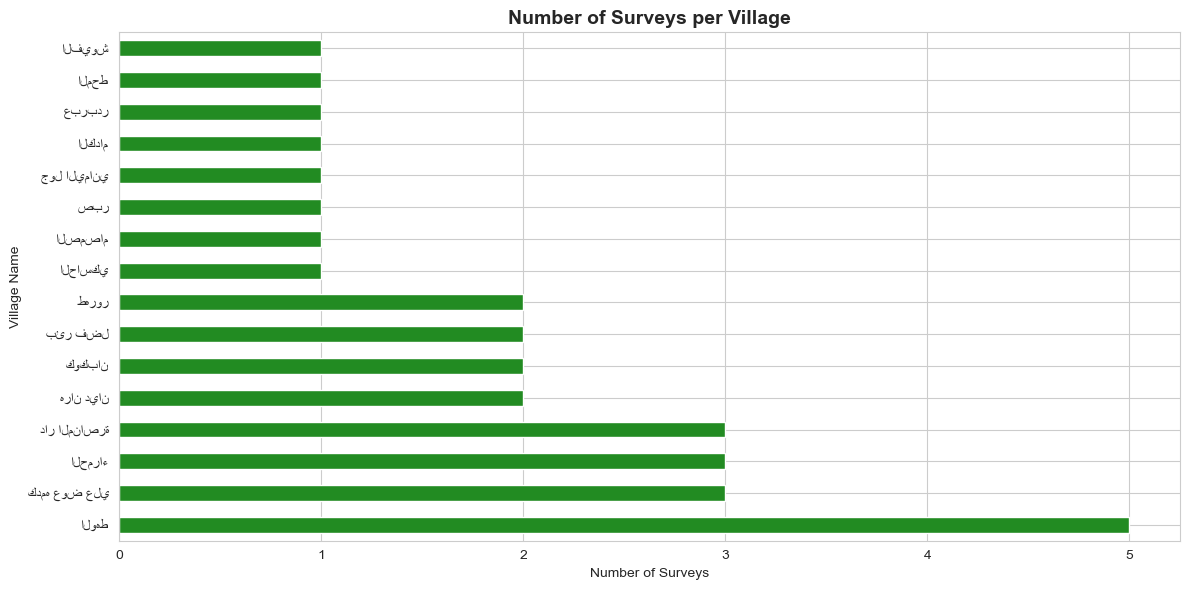

In [13]:
# Village distribution
if 'village_name' in df.columns:
    print("Surveys per Village:")
    print("=" * 100)
    
    village_counts = df['village_name'].value_counts()
    print(village_counts)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    village_counts.plot(kind='barh', color='forestgreen')
    plt.title('Number of Surveys per Village', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Surveys')
    plt.ylabel('Village Name')
    plt.tight_layout()
    plt.show()

## 6. Farm Information Analysis

Crop Type Distribution:
crop_type
Onion          14
Leafy plant     6
pepper          6
Eggplant        2
Tomato          2
Name: count, dtype: int64


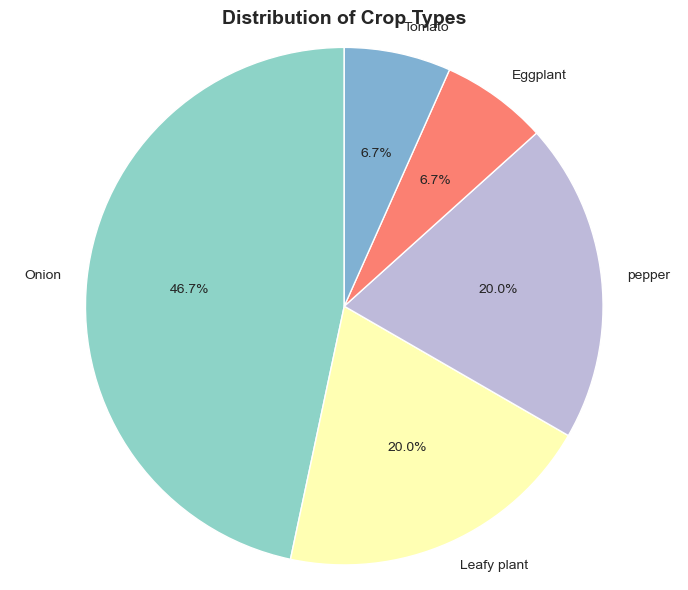

In [14]:
# Crop type distribution
if 'crop_type' in df.columns:
    print("Crop Type Distribution:")
    print("=" * 100)
    
    crop_counts = df['crop_type'].value_counts()
    print(crop_counts)
    
    # Visualization - Pie chart
    plt.figure(figsize=(7, 6))
    colors = plt.cm.Set3(range(len(crop_counts)))
    plt.pie(crop_counts.values, labels=crop_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
    plt.title('Distribution of Crop Types', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

Irrigation System Type Distribution:
irrigation_system_type
Traditional    15
Drip           15
Name: count, dtype: int64


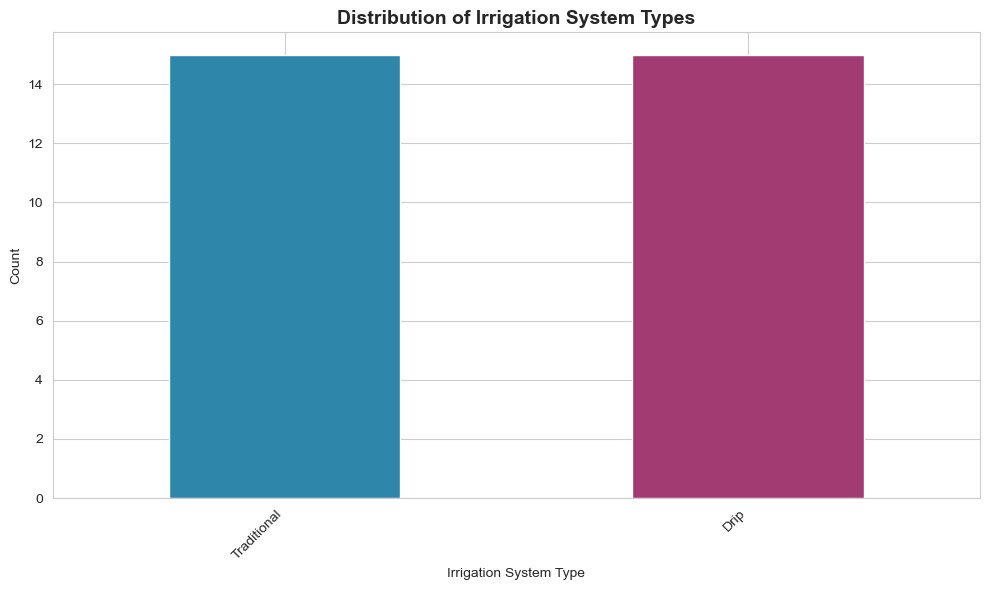

In [15]:
# Irrigation system distribution
if 'irrigation_system_type' in df.columns:
    print("Irrigation System Type Distribution:")
    print("=" * 100)
    
    irrigation_counts = df['irrigation_system_type'].value_counts()
    print(irrigation_counts)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    irrigation_counts.plot(kind='bar', color=['#2E86AB', '#A23B72'])
    plt.title('Distribution of Irrigation System Types', fontsize=14, fontweight='bold')
    plt.xlabel('Irrigation System Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Crop Type vs Irrigation System Cross-tabulation:


irrigation_system_type,Drip,Traditional,All
crop_type,,,
Eggplant,1,1,2
Leafy plant,3,3,6
Onion,7,7,14
Tomato,1,1,2
pepper,3,3,6
All,15,15,30


<Figure size 1200x600 with 0 Axes>

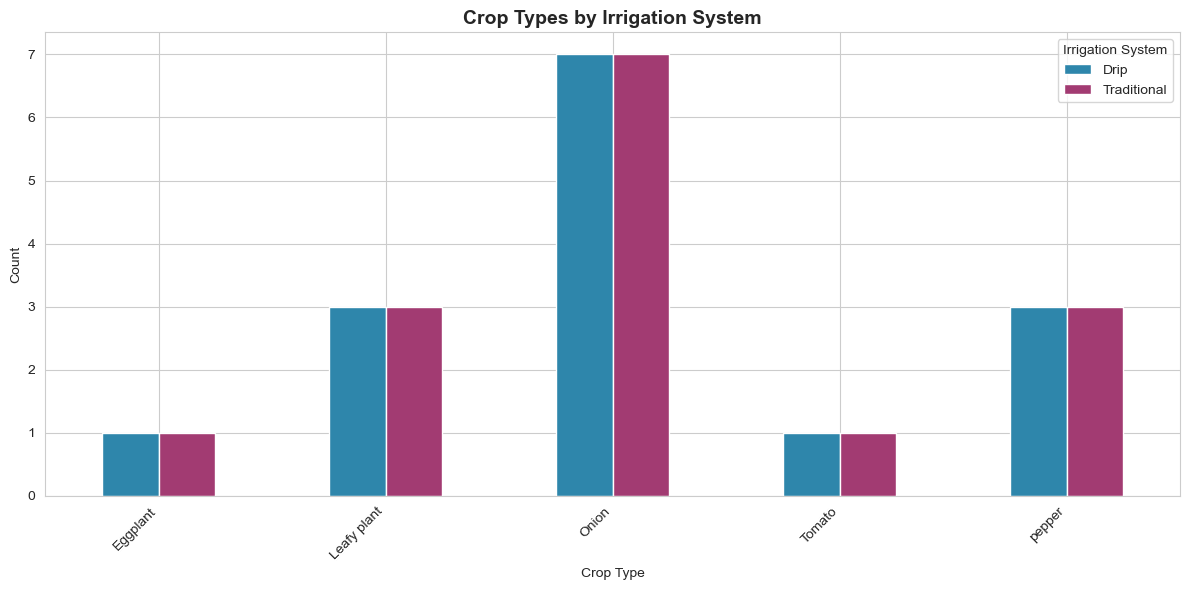

In [16]:
# Crop type vs Irrigation system
if 'crop_type' in df.columns and 'irrigation_system_type' in df.columns:
    print("Crop Type vs Irrigation System Cross-tabulation:")
    print("=" * 100)
    
    crosstab = pd.crosstab(df['crop_type'], df['irrigation_system_type'], margins=True)
    display(crosstab)
    
    # Visualization - Grouped bar chart
    crosstab_plot = pd.crosstab(df['crop_type'], df['irrigation_system_type'])
    
    plt.figure(figsize=(12, 6))
    crosstab_plot.plot(kind='bar', stacked=False, color=['#2E86AB', '#A23B72'])
    plt.title('Crop Types by Irrigation System', fontsize=14, fontweight='bold')
    plt.xlabel('Crop Type')
    plt.ylabel('Count')
    plt.legend(title='Irrigation System')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 7. Cost Analysis

In [17]:
# Identify all cost columns
cost_columns = [col for col in df.columns if 'cost' in col or 'cost' in col.lower()]

print(f"Cost-related columns found: {len(cost_columns)}")
print("=" * 100)

# Filter to numeric cost columns
numeric_cost_cols = [col for col in cost_columns if col in numeric_cols]
print(f"\nNumeric cost columns: {len(numeric_cost_cols)}")

for col in numeric_cost_cols[:10]:  # Show first 10
    print(f"  • {col}")

Cost-related columns found: 21

Numeric cost columns: 21
  • land_prep_plowing_cost_per_acre
  • land_prep_settlement_cost_per_acre
  • land_prep_division_cost_per_acre
  • land_prep_terracing_cost_per_acre
  • land_prep_total_cost
  • land_prep_labor_total_cost
  • land_prep_grand_total_cost
  • nursery_prep_total_cost
  • cultivation_labor_total_cost
  • fertilizer_cost_yer


In [18]:
# Summary statistics for major cost categories
major_costs = [
    'land_prep_grand_total_cost',
    'fertilizer_total_cost',
    'pest_control_grand_total_cost',
    'water_grand_total_cost'
]

existing_major_costs = [col for col in major_costs if col in df.columns]

if existing_major_costs:
    print("Major Cost Categories - Summary Statistics:")
    print("=" * 100)
    display(df[existing_major_costs].describe())

Major Cost Categories - Summary Statistics:


,land_prep_grand_total_cost,fertilizer_total_cost,pest_control_grand_total_cost,water_grand_total_cost
count,30.00,30.00,30.00,30.00
mean,49466.67,39973.33,29013.33,76857.33
std,52379.24,39314.72,30625.75,41625.78
min,0.00,0.00,0.00,14680.00
25%,0.00,3500.00,6250.00,47750.00
50%,30000.00,35000.00,22500.00,65340.00
75%,82625.00,51350.00,41500.00,101750.00
max,173000.00,144000.00,107000.00,184320.00


Average Costs by Irrigation System Type:


,land_prep_grand_total_cost,fertilizer_total_cost,pest_control_grand_total_cost,water_grand_total_cost
irrigation_system_type,,,,
Drip,21733.33,25380.00,22133.33,70826.67
Traditional,77200.00,54566.67,35893.33,82888.00


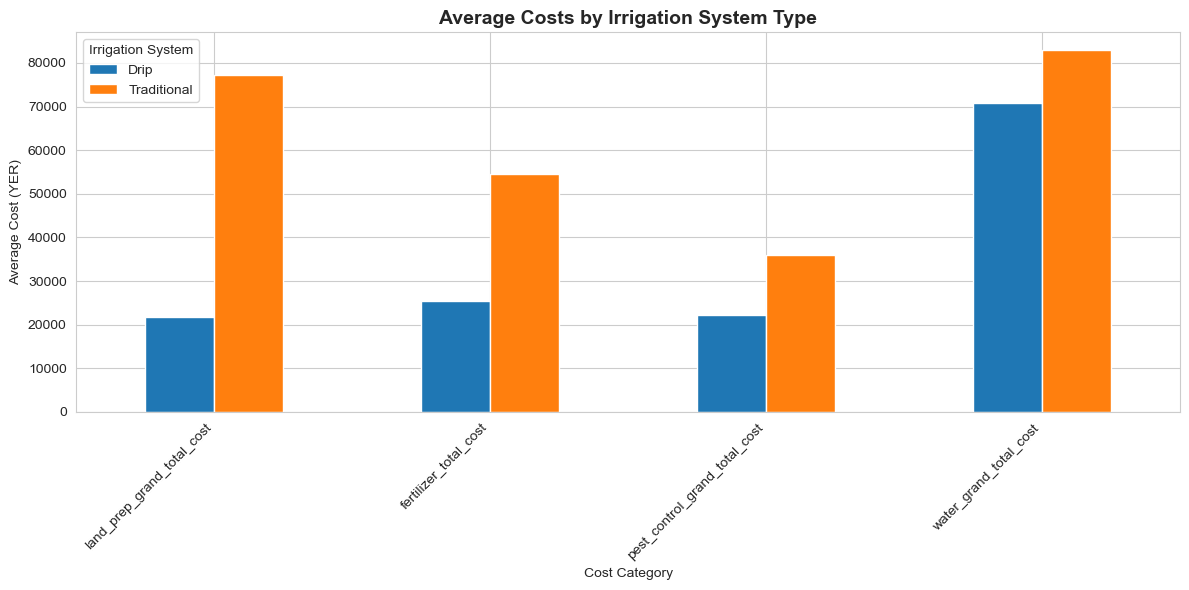

In [19]:
# Average costs by irrigation system
if 'irrigation_system_type' in df.columns and existing_major_costs:
    print("Average Costs by Irrigation System Type:")
    print("=" * 100)
    
    cost_by_irrigation = df.groupby('irrigation_system_type')[existing_major_costs].mean()
    display(cost_by_irrigation)
    
    # Visualization
    cost_by_irrigation.T.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Costs by Irrigation System Type', fontsize=14, fontweight='bold')
    plt.xlabel('Cost Category')
    plt.ylabel('Average Cost (YER)')
    plt.legend(title='Irrigation System')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Average Costs by Crop Type:


,land_prep_grand_total_cost,fertilizer_total_cost,pest_control_grand_total_cost,water_grand_total_cost
crop_type,,,,
Eggplant,49000.00,9000.00,25000.00,75340.00
Leafy plant,52166.67,20250.00,5833.33,72446.67
Onion,57071.43,44628.57,35428.57,71977.14
Tomato,72500.00,47000.00,65000.00,147160.00
pepper,21500.00,56816.67,26566.67,69726.67


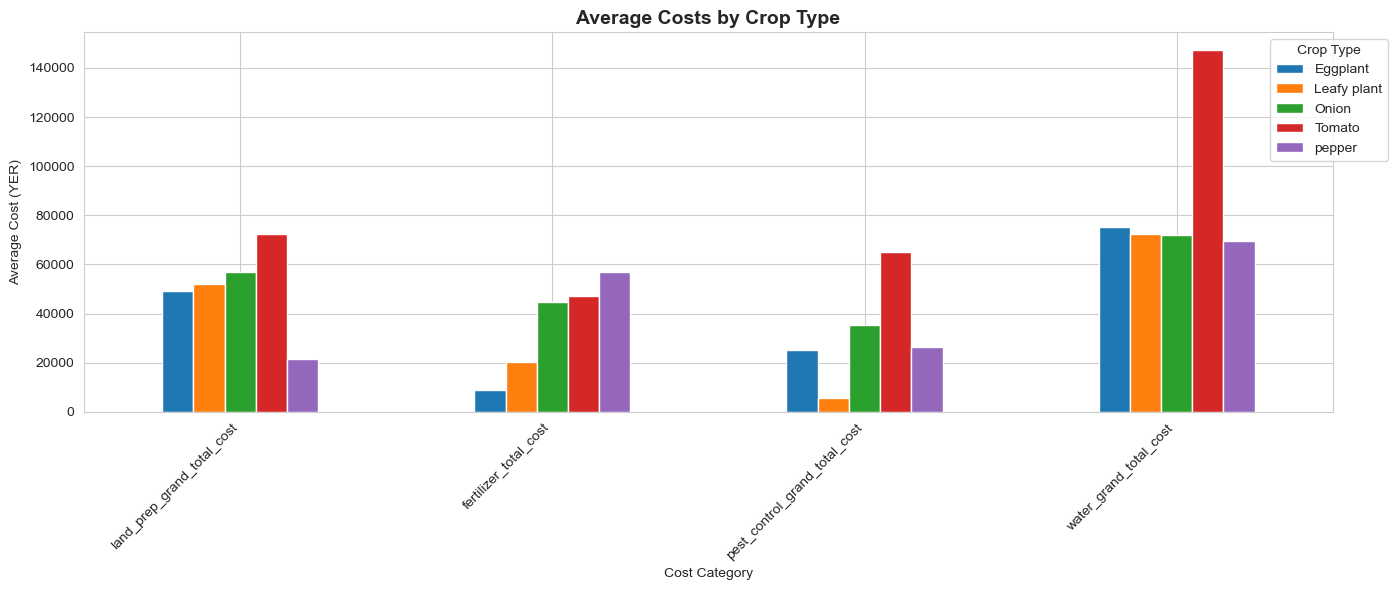

In [20]:
# Average costs by crop type
if 'crop_type' in df.columns and existing_major_costs:
    print("Average Costs by Crop Type:")
    print("=" * 100)
    
    cost_by_crop = df.groupby('crop_type')[existing_major_costs].mean()
    display(cost_by_crop)
    
    # Visualization
    cost_by_crop.T.plot(kind='bar', figsize=(14, 6))
    plt.title('Average Costs by Crop Type', fontsize=14, fontweight='bold')
    plt.xlabel('Cost Category')
    plt.ylabel('Average Cost (YER)')
    plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 8. Distribution Analysis

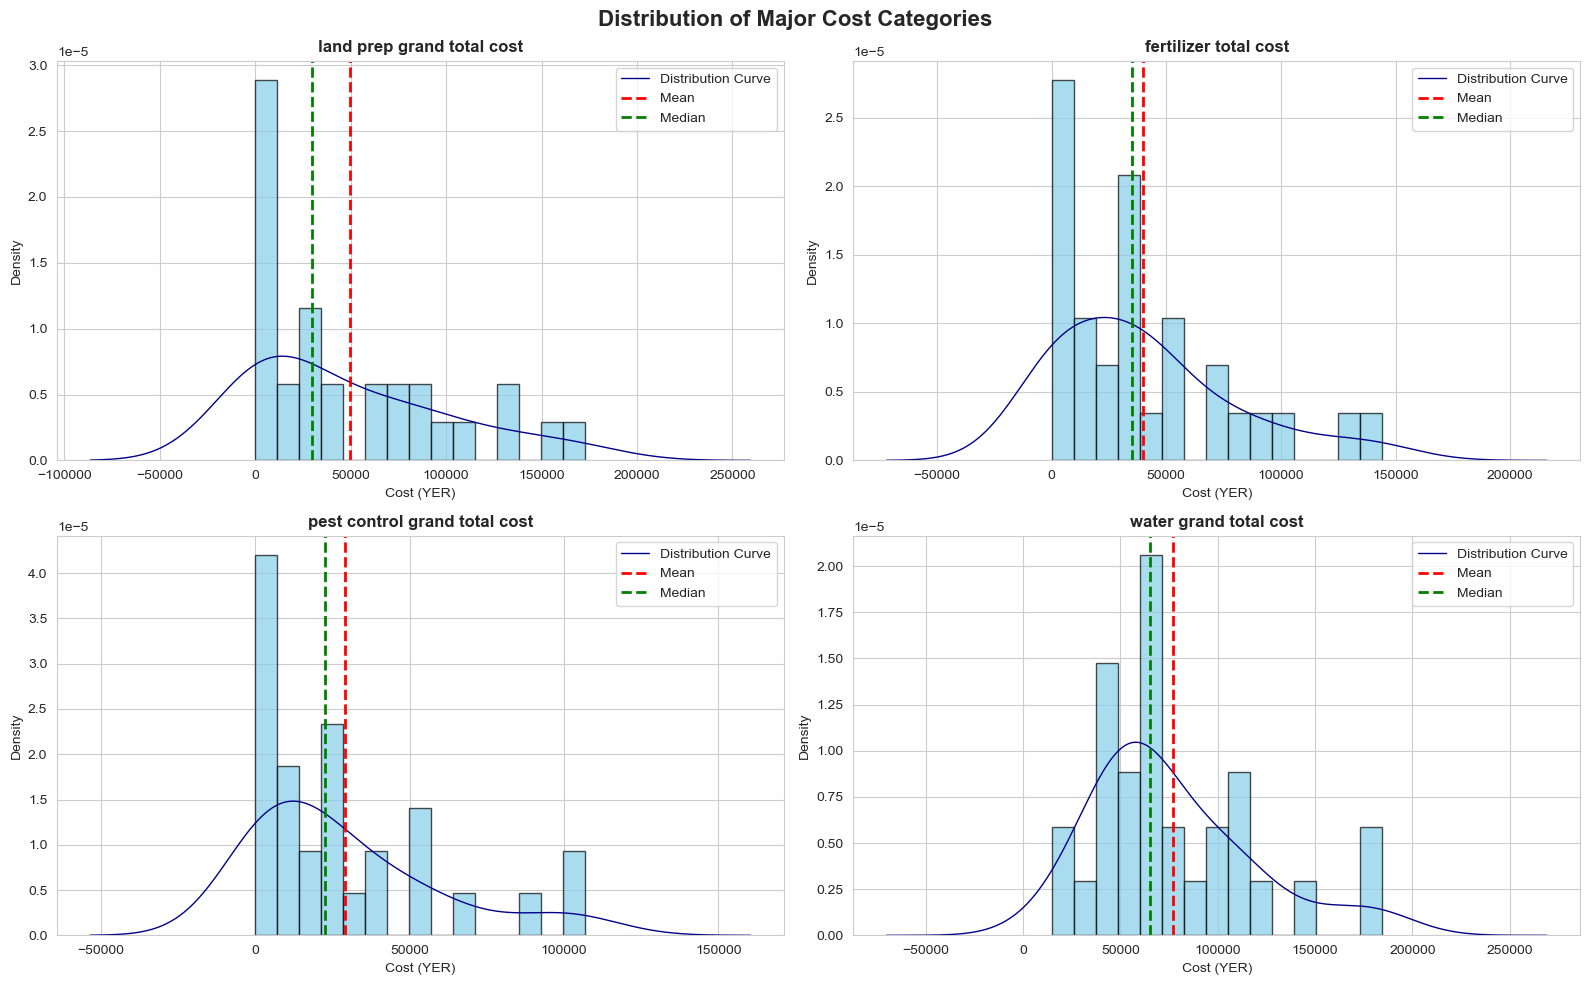

In [21]:
# # Distribution of major cost categories
# if existing_major_costs:
#     fig, axes = plt.subplots(2, 2, figsize=(16, 10))
#     fig.suptitle('Distribution of Major Cost Categories', fontsize=16, fontweight='bold')
    
#     for idx, col in enumerate(existing_major_costs[:4]):
#         ax = axes[idx // 2, idx % 2]
#         df[col].hist(bins=15, ax=ax, color='skyblue', edgecolor='black')
#         ax.set_title(col.replace('_', ' '), fontweight='bold')
#         ax.set_xlabel('Cost (YER)')
#         ax.set_ylabel('Frequency')
#         ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
#         ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label='Median')
#         ax.legend()
    
#     plt.tight_layout()
#     plt.show()

import seaborn as sns

# Distribution of major cost categories
if existing_major_costs:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Distribution of Major Cost Categories', fontsize=16, fontweight='bold')
    
    for idx, col in enumerate(existing_major_costs[:4]):
        ax = axes[idx // 2, idx % 2]
        
        # Create histogram with density normalization
        df[col].hist(bins=15, ax=ax, color='skyblue', edgecolor='black', density=True, alpha=0.7)
        
        # Add KDE (distribution curve)
        df[col].plot(kind='kde', ax=ax, color='darkblue', linewidth=1.0, label='Distribution Curve')
        
        ax.set_title(col.replace('_', ' '), fontweight='bold')
        ax.set_xlabel('Cost (YER)')
        ax.set_ylabel('Density')  # Changed from 'Frequency' since we're using density=True
        ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label='Median')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

    



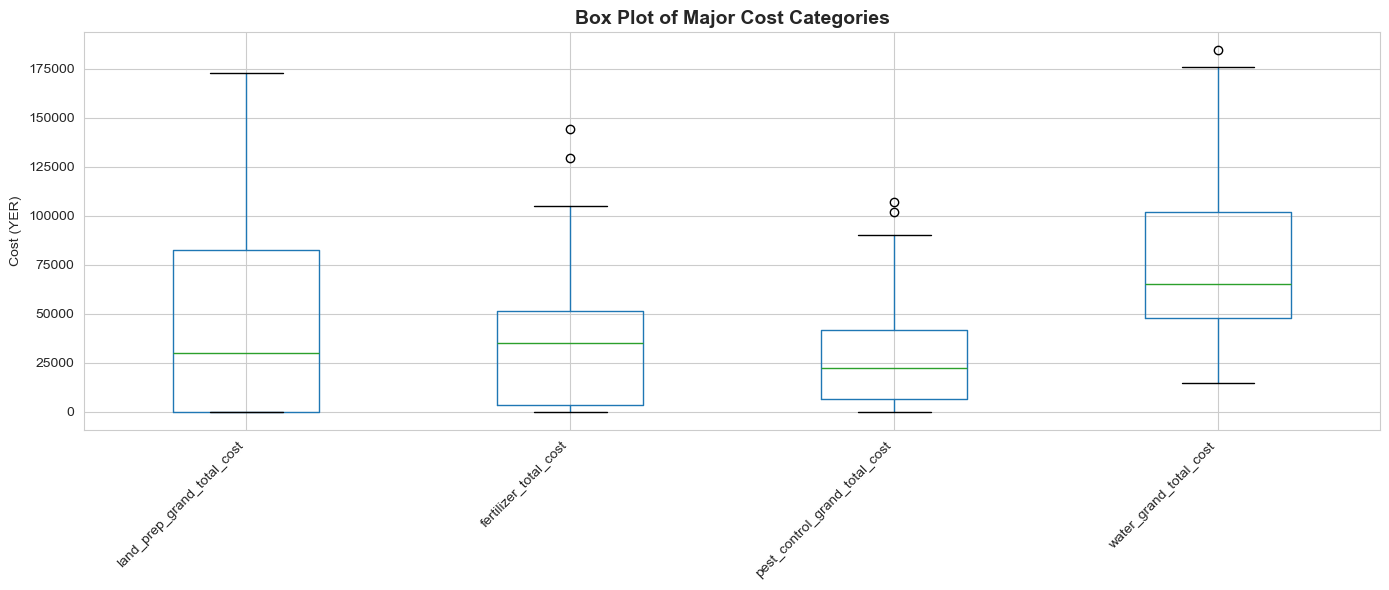

In [22]:
# Box plots for cost categories
if existing_major_costs:
    plt.figure(figsize=(14, 6))
    df[existing_major_costs].boxplot()
    plt.title('Box Plot of Major Cost Categories', fontsize=14, fontweight='bold')
    plt.ylabel('Cost (YER)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 9. Water Consumption Analysis

In [23]:
# Water-related metrics
water_metrics = [
    'water_pumping_hours_per_irrigation',
    'water_irrigation_frequency_per_month',
    'water_diesel_cost',
    'water_grand_total_cost'
]

existing_water_metrics = [col for col in water_metrics if col in df.columns]

if existing_water_metrics:
    print("Water Consumption Metrics - Summary:")
    print("=" * 100)
    display(df[existing_water_metrics].describe())

Water Consumption Metrics - Summary:


,water_pumping_hours_per_irrigation,water_irrigation_frequency_per_month,water_diesel_cost,water_grand_total_cost
count,30.00,30.00,30.00,30.00
mean,6.90,7.37,52890.67,76857.33
std,4.96,4.08,30982.81,41625.78
min,2.00,2.00,10680.00,14680.00
25%,3.00,4.00,32000.00,47750.00
50%,4.00,6.50,45340.00,65340.00
75%,11.25,10.00,64000.00,101750.00
max,16.00,15.00,149320.00,184320.00


Water Metrics by Irrigation System Type:


,water_pumping_hours_per_irrigation,water_irrigation_frequency_per_month,water_diesel_cost,water_grand_total_cost
irrigation_system_type,,,,
Drip,3.47,10.53,47026.67,70826.67
Traditional,10.33,4.20,58754.67,82888.00


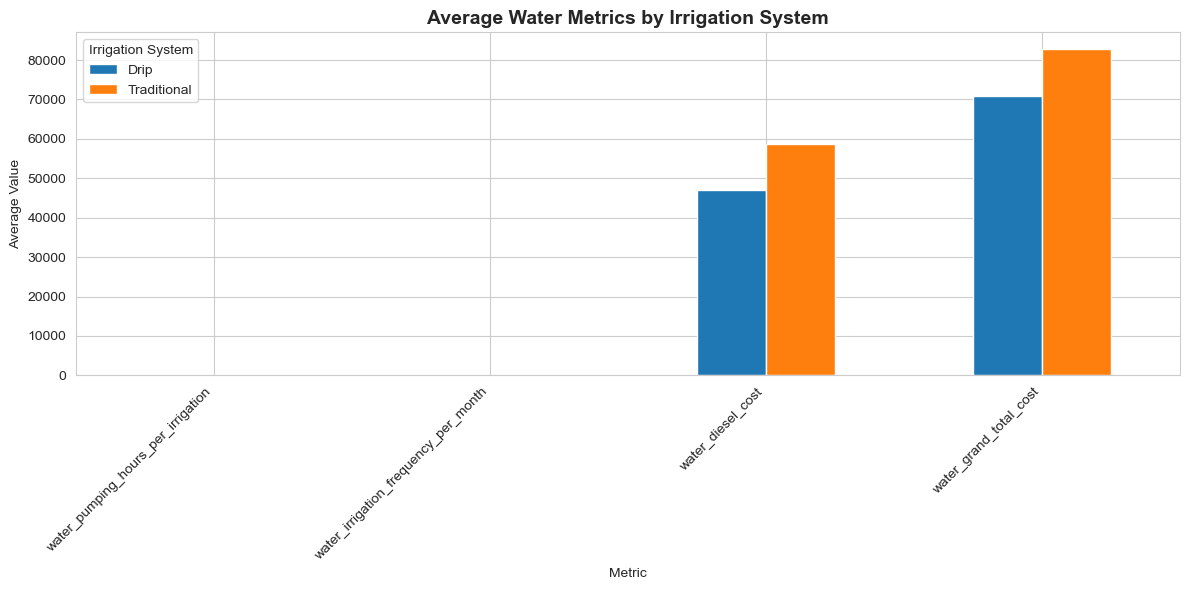

In [24]:
# Water consumption by irrigation system
if 'irrigation_system_type' in df.columns and existing_water_metrics:
    print("Water Metrics by Irrigation System Type:")
    print("=" * 100)
    
    water_by_system = df.groupby('irrigation_system_type')[existing_water_metrics].mean()
    display(water_by_system)
    
    # Visualization
    water_by_system.T.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Water Metrics by Irrigation System', fontsize=14, fontweight='bold')
    plt.xlabel('Metric')
    plt.ylabel('Average Value')
    plt.legend(title='Irrigation System')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 10. Production Analysis

In [25]:
# Production metrics
production_metrics = [
    'production_quantity_baskets_kg',
    'production_harvest_frequency_per_month',
    'production_total_harvest_cost'
]

existing_prod_metrics = [col for col in production_metrics if col in df.columns]

if existing_prod_metrics:
    print("Production Metrics - Summary:")
    print("=" * 100)
    display(df[existing_prod_metrics].describe())

Production Metrics - Summary:


,production_quantity_baskets_kg,production_harvest_frequency_per_month,production_total_harvest_cost
count,28.00,28.00,30.00
mean,1964.46,0.96,79.33
std,5404.86,1.20,89.94
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,97.50,1.00,50.00
75%,350.00,1.00,150.00
max,24000.00,5.00,280.00


Production Metrics by Crop Type:


,production_quantity_baskets_kg,production_harvest_frequency_per_month,production_total_harvest_cost
crop_type,,,
Eggplant,60.00,1.00,125.00
Leafy plant,114.17,1.00,83.33
Onion,3615.38,0.23,32.14
Tomato,2000.00,3.00,150.00
pepper,640.00,2.00,146.67


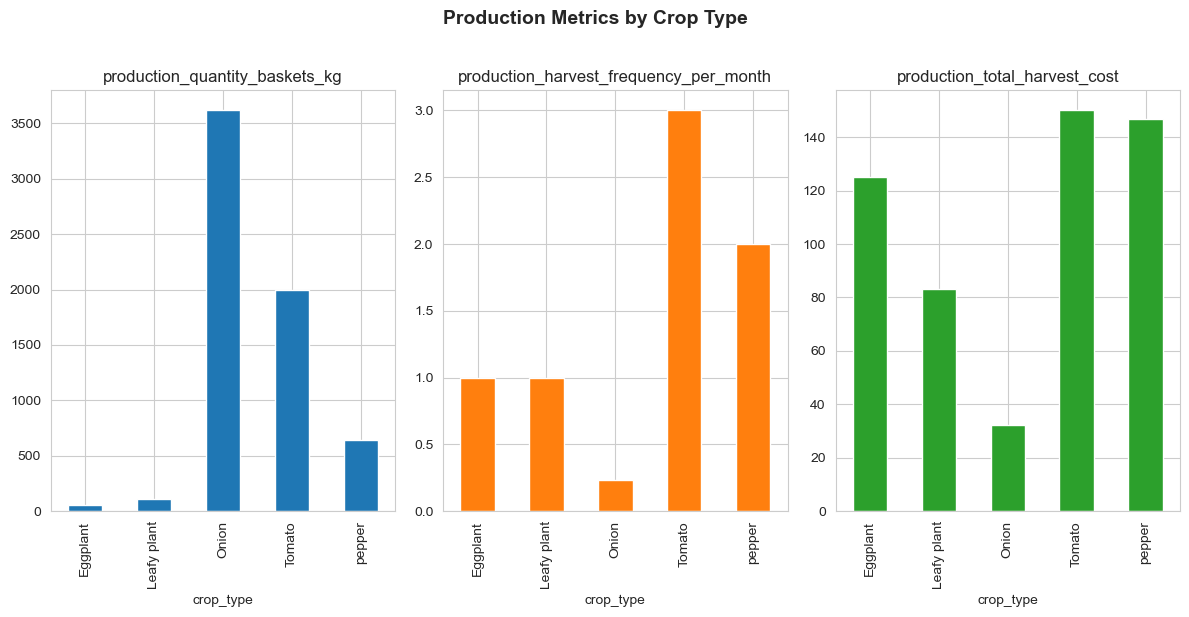

In [26]:
# Production by crop type
if 'crop_type' in df.columns and existing_prod_metrics:
    print("Production Metrics by Crop Type:")
    print("=" * 100)
    
    prod_by_crop = df.groupby('crop_type')[existing_prod_metrics].mean()
    display(prod_by_crop)
    
    # Visualization
    prod_by_crop.plot(kind='bar', figsize=(12, 6), subplots=True, layout=(1, 3), 
                      legend=False, sharex=False)
    plt.suptitle('Production Metrics by Crop Type', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

## 11. Correlation Analysis

Correlation Matrix - Major Cost Categories:


,land_prep_grand_total_cost,fertilizer_total_cost,pest_control_grand_total_cost,water_grand_total_cost
land_prep_grand_total_cost,1.00,0.35,0.71,0.46
fertilizer_total_cost,0.35,1.00,0.53,0.16
pest_control_grand_total_cost,0.71,0.53,1.00,0.54
water_grand_total_cost,0.46,0.16,0.54,1.00


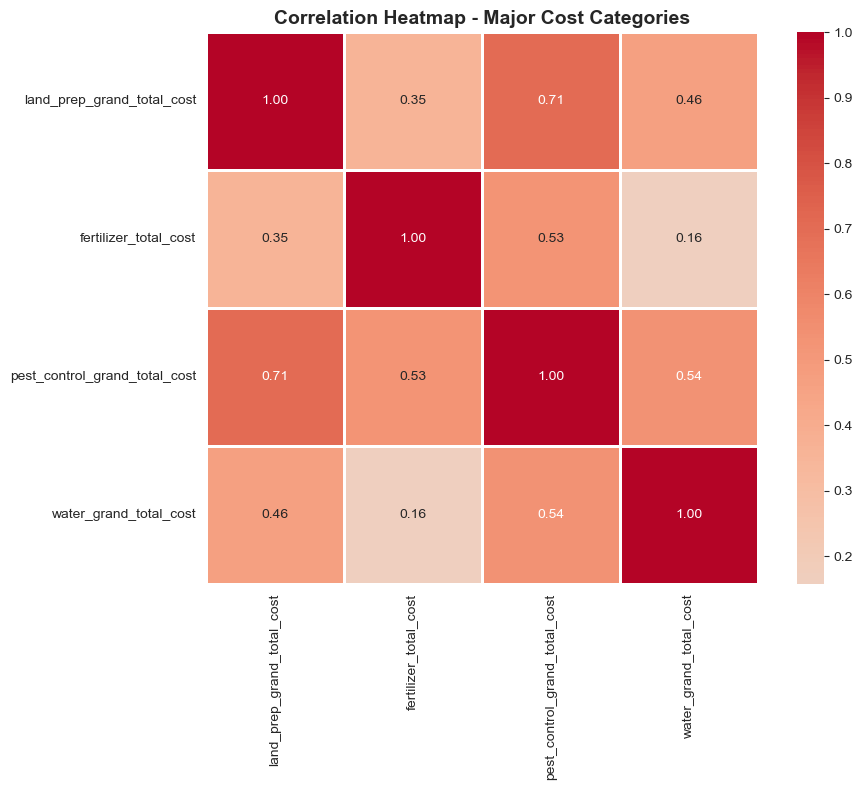

In [27]:
# Correlation matrix for cost-related columns
if len(numeric_cost_cols) > 1:
    # Select subset of meaningful cost columns
    key_cost_cols = [col for col in existing_major_costs if col in df.columns]
    
    if len(key_cost_cols) > 1:
        print("Correlation Matrix - Major Cost Categories:")
        print("=" * 100)
        
        correlation = df[key_cost_cols].corr()
        display(correlation)
        
        # Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
                    center=0, square=True, linewidths=1)
        plt.title('Correlation Heatmap - Major Cost Categories', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

## 12. Key Insights and Findings

In [28]:
print("=" * 100)
print("KEY INSIGHTS FROM EDA")
print("=" * 100)

insights = []

# Dataset overview
insights.append(f"\n📊 Dataset Overview:")
insights.append(f"   • Total survey responses: {len(df)}")
insights.append(f"   • Total variables measured: {len(df.columns)}")
insights.append(f"   • Data completeness: {(df.notnull().all(axis=1).sum() / len(df) * 100):.1f}% of rows complete")

# Crop diversity
if 'crop_type' in df.columns:
    insights.append(f"\n🌾 Crop Diversity:")
    insights.append(f"   • Number of different crops: {df['crop_type'].nunique()}")
    insights.append(f"   • Most common crop: {df['crop_type'].mode()[0]} ({df['crop_type'].value_counts().iloc[0]} farms)")

# Irrigation systems
if 'irrigation_system_type' in df.columns:
    insights.append(f"\n💧 Irrigation Systems:")
    for system, count in df['irrigation_system_type'].value_counts().items():
        pct = (count / len(df)) * 100
        insights.append(f"   • {system}: {count} farms ({pct:.1f}%)")

# Cost insights
if existing_major_costs:
    insights.append(f"\n💰 Cost Insights:")
    for col in existing_major_costs:
        if col in df.columns:
            avg_cost = df[col].mean()
            insights.append(f"   • Average {col.replace('_', ' ')}: {avg_cost:,.0f} YER")

# Print all insights
for insight in insights:
    print(insight)

print("\n" + "=" * 100)

KEY INSIGHTS FROM EDA

📊 Dataset Overview:
   • Total survey responses: 30
   • Total variables measured: 55
   • Data completeness: 56.7% of rows complete

🌾 Crop Diversity:
   • Number of different crops: 5
   • Most common crop: Onion (14 farms)

💧 Irrigation Systems:
   • Traditional: 15 farms (50.0%)
   • Drip: 15 farms (50.0%)

💰 Cost Insights:
   • Average land prep grand total cost: 49,467 YER
   • Average fertilizer total cost: 39,973 YER
   • Average pest control grand total cost: 29,013 YER
   • Average water grand total cost: 76,857 YER



## 13. Summary and Recommendations

### 📌 Summary of EDA

This exploratory data analysis covered:

1. **Data Quality**: Assessed completeness, duplicates, and data types
2. **Survey Overview**: Distribution of surveys by surveyor, village, and date
3. **Farm Characteristics**: Crop types and irrigation systems in use
4. **Cost Analysis**: Breakdown of costs across different farming activities
5. **Water Usage**: Analysis of water consumption and irrigation patterns
6. **Production**: Harvest quantities and frequencies by crop type
7. **Correlations**: Relationships between different cost categories

### 🎯 Next Steps

Based on this EDA, recommended analyses:

1. **Cost-Benefit Analysis**: Compare total costs vs production output by irrigation system
2. **Efficiency Metrics**: Calculate cost per kg of production for each crop/system combination
3. **Water Efficiency**: Analyze water consumption relative to production output
4. **Predictive Modeling**: Build models to predict production costs based on farm characteristics
5. **Optimization**: Identify best practices from high-performing farms

### 📈 Potential Visualizations

- Geographic mapping of farms (if coordinates available)
- Time series analysis of survey dates
- Interactive dashboards for cost comparisons
- Sankey diagrams showing cost breakdowns

---

**End of Exploratory Data Analysis** 🎉